In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
df_path = '/content/drive/MyDrive/ColabNotebooks/KeepCodingIA/NLP/Project/Data/final_df.csv'
data = pd.read_csv(df_path)

## Text preprocessing

In [4]:
data.head(1)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,NaN


In [7]:
!pip install pyspellchecker
!pip install spacy

I’m going to use a subset of 500 reviews since I tested it with 100 and it takes 2 minutes to execute. I’m concerned that if I use all 10,000 in this dataset, the execution time might be too high.

In [10]:
import spacy
import re
from spacy.lang.en.stop_words import STOP_WORDS
from spellchecker import SpellChecker

# Load the Spacy model
nlp = spacy.load("en_core_web_sm")

def preprocess_reviews_spacy(reviews):
    preprocessed_reviews = []
    spell = SpellChecker()  # We use the spell checker

    # Correct spelling errors before passing to spaCy
    corrected_reviews = []
    for review in reviews:
        review = review.lower()  # Convert to lowercase
        review = re.sub(r'[^a-z\s]', '', review)  # Remove non-alphabetic characters
        review = re.sub(r'(.)\1+', r'\1\1', review)  # Limit excessive character repetition
        review = re.sub(r'http\S+|www\S+', '', review)  # Remove URLs

        words = review.split()  # Split into words
        corrected_words = [spell.correction(word) for word in words if word is not None]
        corrected_words = [word for word in corrected_words if word is not None]
        corrected_reviews.append(" ".join(corrected_words))  # Join corrected words

    # Process in batches with nlp.pipe()
    for doc in nlp.pipe(corrected_reviews, batch_size=50):
        # Filter stopwords, lemmatize, and remove words less than 2 characters
        words = [
            token.lemma_ for token in doc
            if token.text not in STOP_WORDS and len(token.text) > 2
        ]
        preprocessed_reviews.append(" ".join(words))  # Join lemmatized words

    return preprocessed_reviews


/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [11]:
preprocessed_reviews = preprocess_reviews_spacy(data['reviewText'].tolist())

print(preprocessed_reviews[:5])
print(len(preprocessed_reviews))

['game bit hard hang great', 'play alright steam bit trouble game steam hard time activate play game spite fun like look forward annoy want play way moon', 'great game love play arrive', 'like lot time play wonderful game simply funny game good game', 'buy game think pretty cool play week boy wrong moment finally get gamed fire comment right take forever force create account watch boot tell right bat lot thought go make game play city game try easily navigate mufti layer play month straight discover layer complexity game thing game tweak star game']
500


In [12]:
data['reviewText'][1]

'I played it a while but it was alright. The steam was a bit of trouble. The more they move these game to steam the more of a hard time I have activating and playing a game. But in spite of that it was fun, I liked it. Now I am looking forward to anno 2205 I really want to play my way to the moon.'

In [13]:
type(preprocessed_reviews)

list

In [14]:
preprocessed_reviews[1]

'play alright steam bit trouble game steam hard time activate play game spite fun like look forward annoy want play way moon'

## Rate preprocessing


In [15]:
y = data['overall'].apply(lambda rate: 1 if rate >= 4 else 0)

In [16]:
y.value_counts()

,count
overall,
1,250
0,250


In [17]:
import numpy as np
y = np.array(y)

# Vectorization

### Vectorization with Count Vectorizer

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

def vectorize_reviews(reviews):
    # Initialize the vectorizer
    vectorizer = CountVectorizer(max_features=1000, min_df=0.01, max_df=0.8)

    # Fit the model and transform the reviews
    X = vectorizer.fit_transform(reviews)

    # Return only the vectorizer
    return X, vectorizer

# Call the vectorization function
X, vectorizer = vectorize_reviews(preprocessed_reviews)

# Display the feature matrix
print("Feature matrix:")
print(X[:10])

# Access and display the vocabulary using the vectorizer
vocab = vectorizer.get_feature_names_out()
print("\nVocabulary:")
print(vocab[:20])  # Display the first 20 words of the vocabulary


Feature matrix:
  (0, 268)	1
  (0, 55)	1
  (0, 293)	1
  (0, 281)	1
  (1, 268)	2
  (1, 55)	1
  (1, 293)	1
  (1, 469)	3
  (1, 17)	1
  (1, 672)	1
  (1, 660)	1
  (1, 265)	1
  (1, 359)	1
  (1, 369)	1
  (1, 257)	1
  (1, 23)	1
  (1, 704)	1
  (1, 709)	1
  (2, 268)	1
  (2, 281)	1
  (2, 469)	1
  (2, 373)	1
  (2, 32)	1
  (3, 268)	3
  (3, 469)	1
  :	:
  (9, 357)	1
  (9, 90)	1
  (9, 462)	1
  (9, 290)	1
  (9, 441)	2
  (9, 47)	1
  (9, 356)	1
  (9, 308)	1
  (9, 619)	2
  (9, 510)	1
  (9, 723)	1
  (9, 231)	1
  (9, 321)	1
  (9, 132)	1
  (9, 153)	1
  (9, 608)	1
  (9, 370)	1
  (9, 284)	1
  (9, 596)	1
  (9, 544)	1
  (9, 593)	1
  (9, 335)	1
  (9, 716)	1
  (9, 196)	1
  (9, 228)	1

Vocabulary:
['able' 'absolutely' 'act' 'action' 'actual' 'actually' 'add' 'addition'
 'additional' 'admit' 'advance' 'adventure' 'advertise' 'age' 'ago'
 'ahead' 'allow' 'alright' 'amazing' 'amazon']


I added a spell checker because we encountered many spelling mistakes and duplicated letters, for example: ``` ['aa' 'aaa' 'aaaaaarrrrrrrhhhhhhgggggg' 'aaaahhhh' 'aaaanywayplay' 'aaaarrghhh' 'aaaarrrrghgh' 'aaab' 'aaahhhh' 'aaas']```

I decided not to implement NER because the dataset is small, we don't use the product ID, so the product name doesn't appear directly in the reviews, and it can't extract relevant information from there. I'm concerned that since it's not relevant and we won't use it in the model, it might add noise.

## Vectorization with BoW

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import pickle

# CountVectorizer (BoW)
vectorizer = CountVectorizer(max_features=1000, min_df=0.01, max_df=0.8)
X = vectorizer.fit_transform(preprocessed_reviews)  # Transformamos las reseñas en una matriz de BoW

print("Vocabulario: ", vectorizer.get_feature_names_out()[:10])

# labels
y = y

with open('/content/drive/MyDrive/ColabNotebooks/KeepCodingIA/NLP/Project/Data/X_bow.pkl', 'wb') as f:
    pickle.dump(X, f)

with open('/content/drive/MyDrive/ColabNotebooks/KeepCodingIA/NLP/Project/Data/y_bow.pkl', 'wb') as f:
    pickle.dump(y, f)

with open('/content/drive/MyDrive/ColabNotebooks/KeepCodingIA/NLP/Project/Data/vectorizer_bow.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

print("BoW vectorizer y datos guardados exitosamente.")


Vocabulario:  ['able' 'absolutely' 'act' 'action' 'actual' 'actually' 'add' 'addition'
 'additional' 'admit']
BoW vectorizer y datos guardados exitosamente.


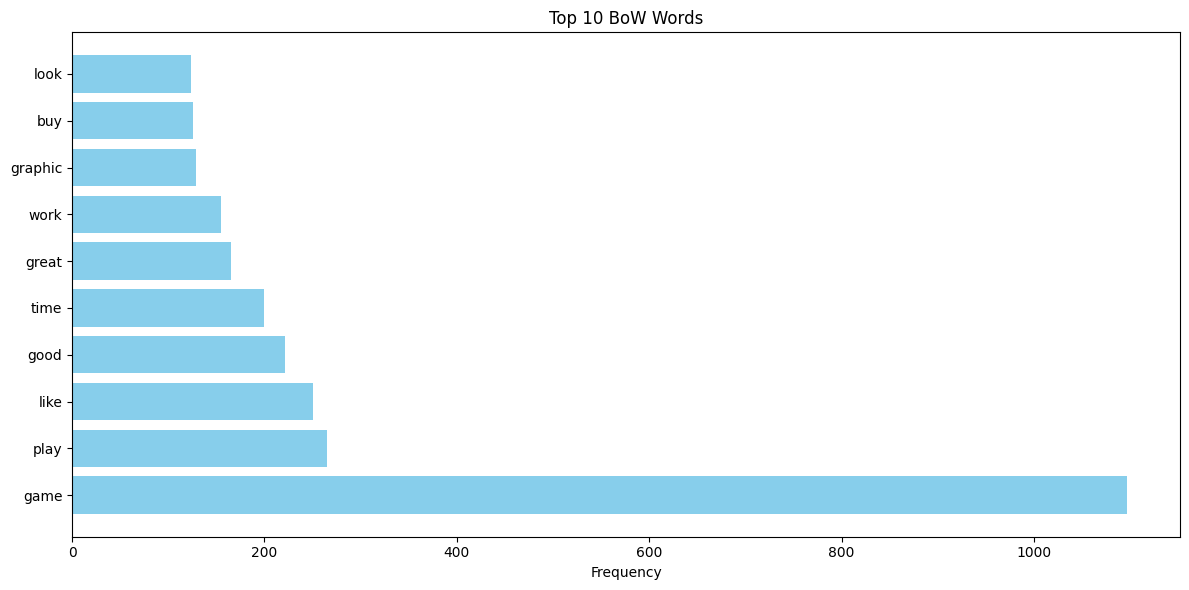

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Most frecuent
bow_vocab = vectorizer.get_feature_names_out()
bow_freq = np.asarray(X.sum(axis=0)).flatten()

# Top 10
bow_top_indices = bow_freq.argsort()[-10:][::-1]
bow_top_words = bow_vocab[bow_top_indices]
bow_top_frequencies = bow_freq[bow_top_indices]


fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.barh(bow_top_words, bow_top_frequencies, color='skyblue')
ax1.set_title('Top 10 BoW Words')
ax1.set_xlabel('Frequency')

plt.tight_layout()
plt.show()

## Vectorization with TF-IDF


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import pickle

# TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer(max_features=1000, min_df=0.01, max_df=0.8)
X_tfidf = vectorizer_tfidf.fit_transform(preprocessed_reviews)  # Transformamos las reseñas en una matriz TF-IDF

print("Vocabulario: ", vectorizer_tfidf.get_feature_names_out()[:10])

# Labels
y = y

with open('/content/drive/MyDrive/ColabNotebooks/KeepCodingIA/NLP/Project/Data/X_tfidf.pkl', 'wb') as f:
    pickle.dump(X_tfidf, f)

with open('/content/drive/MyDrive/ColabNotebooks/KeepCodingIA/NLP/Project/Data/y_tfidf.pkl', 'wb') as f:
    pickle.dump(y, f)

with open('/content/drive/MyDrive/ColabNotebooks/KeepCodingIA/NLP/Project/Data/vectorizer_tfidf.pkl', 'wb') as f:
    pickle.dump(vectorizer_tfidf, f)

print("TF-IDF vectorizer y datos guardados exitosamente.")


Vocabulario:  ['able' 'absolutely' 'act' 'action' 'actual' 'actually' 'add' 'addition'
 'additional' 'admit']
TF-IDF vectorizer y datos guardados exitosamente.


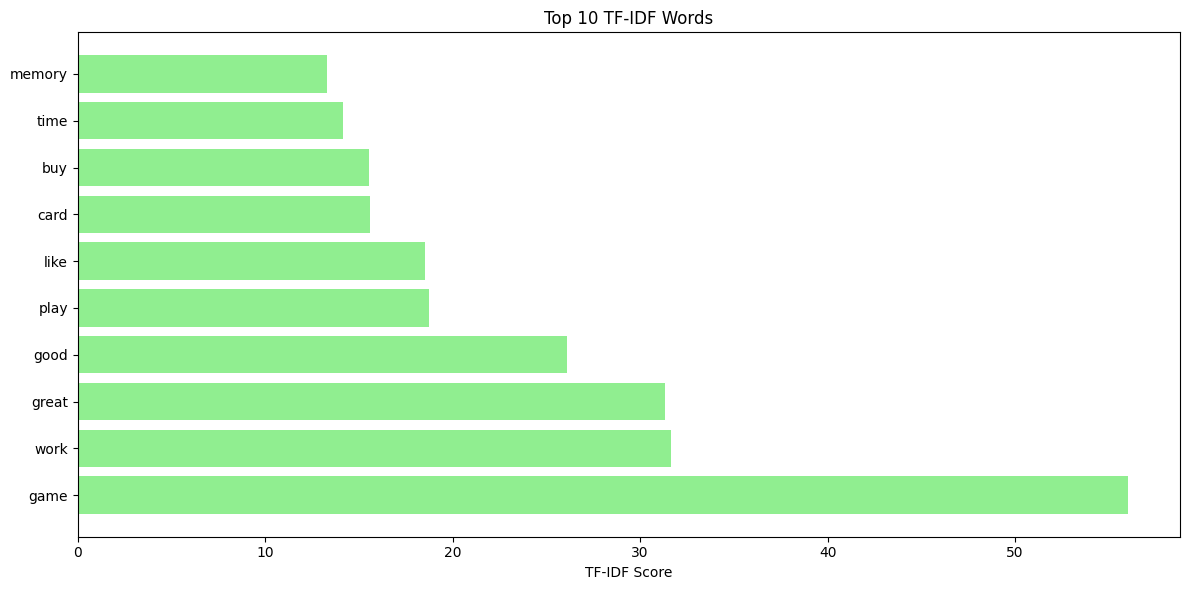

In [22]:
import matplotlib.pyplot as plt
import numpy as np


# Most frecuent TF-IDF
tfidf_vocab = vectorizer_tfidf.get_feature_names_out()
tfidf_freq = np.asarray(X_tfidf.sum(axis=0)).flatten()

# Top 10 TF-IDF
tfidf_top_indices = tfidf_freq.argsort()[-10:][::-1]
tfidf_top_words = tfidf_vocab[tfidf_top_indices]
tfidf_top_frequencies = tfidf_freq[tfidf_top_indices]

fig, ax2 = plt.subplots(figsize=(12, 6))

ax2.barh(tfidf_top_words, tfidf_top_frequencies, color='lightgreen')
ax2.set_title('Top 10 TF-IDF Words')
ax2.set_xlabel('TF-IDF Score')

plt.tight_layout()
plt.show()


# Data saving


In [23]:
len(preprocessed_reviews)

500

In [24]:
dir_path = '/content/drive/MyDrive/ColabNotebooks/KeepCodingIA/NLP/Project/Data'

In [25]:
import pickle
import os

with open(os.path.join(dir_path, 'X_matrix.pkl'), 'wb') as f:
    pickle.dump(X, f)

with open(os.path.join(dir_path, 'y_labels.pkl'), 'wb') as f:
    pickle.dump(y, f)

with open(os.path.join(dir_path, 'vectorizer.pkl'), 'wb') as f:
    pickle.dump(vectorizer, f)


In [26]:
import pandas as pd

preprocessed_df = pd.DataFrame(preprocessed_reviews, columns=['review'])

preprocessed_df.to_csv(os.path.join(dir_path, 'preprocessed_reviews.csv'), index=False)


# Data exploration once preprocessed

### Most frequent words

In [27]:
from collections import Counter
import matplotlib.pyplot as plt
from nltk.probability import FreqDist

In [28]:
all_words = [word for review in preprocessed_reviews for word in review.split()]
word_freq = Counter(all_words)
word_freq_most_common = word_freq.most_common(10)


word_freq_most_common

[('game', 1097),
 ('play', 265),
 ('like', 250),
 ('good', 221),
 ('time', 199),
 ('great', 165),
 ('work', 155),
 ('graphic', 129),
 ('buy', 126),
 ('look', 124)]

**Comparison:**

We can observe that once the stop-words are removed, there is a significant change in the most frequent words. Before, they were words like "the", "and", "to", "a", "i", etc. While now, the words are more meaningful and provide relevant information.

### N-grams

In [29]:
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

def get_n_grams(reviews, n=2):
    # N-grams vectorization
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    ngrams = vectorizer.fit_transform(reviews)

    # Most frecuent
    ngram_freq = Counter(ngrams.toarray().sum(axis=0))

    ngram_names = vectorizer.get_feature_names_out()

    # Pair names for their frecuency
    ngram_freq_dict = dict(zip(ngram_names, ngram_freq))

    # Most common
    ngram_freq_most_common = Counter(ngram_freq_dict).most_common(10)

    return ngram_freq_most_common

def plot_ngram_frequencies(ngram_frequencies, title):
    ngrams, frequencies = zip(*ngram_frequencies)

    plt.figure(figsize=(10, 6))
    plt.barh(ngrams, frequencies)
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('N-Grams')
    plt.gca().invert_yaxis()
    plt.show()



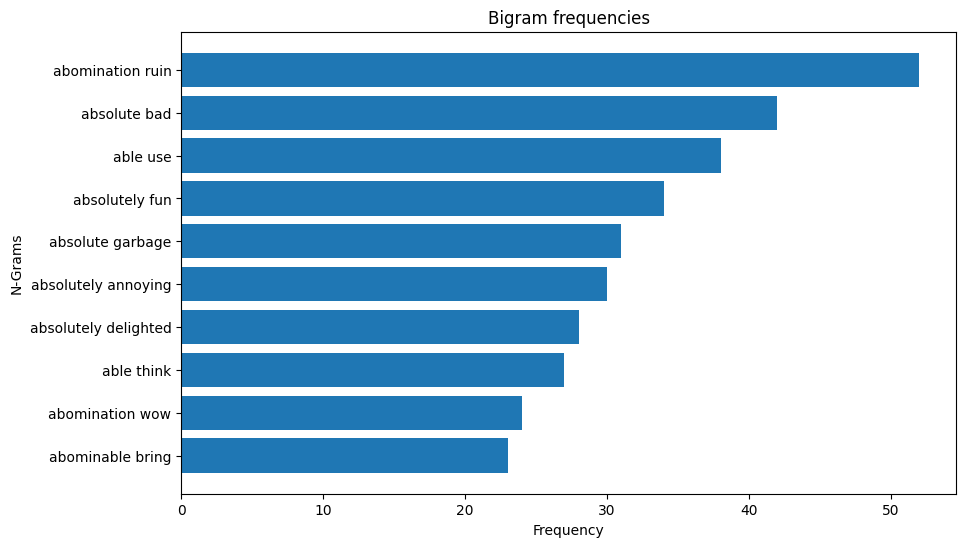

In [30]:
bigrams = get_n_grams(preprocessed_reviews, n=2)
plot_ngram_frequencies(bigrams, 'Bigram frequencies')

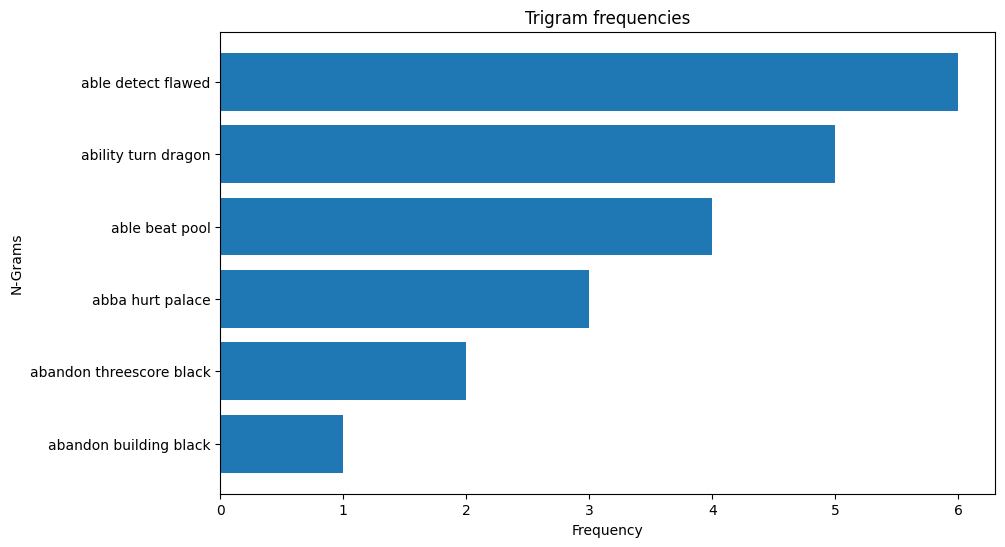

In [31]:
trigrams = get_n_grams(preprocessed_reviews, n=3)
plot_ngram_frequencies(trigrams, 'Trigram frequencies')

**Comparison:**

Once again, we observe that after the stop-word cleaning, the most frequent n-grams reveal much more information about the sentiment of the review.

### Embeddings visualization

In [32]:
import numpy as np
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

In [33]:
w2v_sg = Word2Vec.load('/content/drive/MyDrive/ColabNotebooks/KeepCodingIA/NLP/Project/Data/w2v_model.pkl')

In [34]:
keys = ['game','play','like', 'good', 'time', 'great', 'work', 'buy', 'look']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in w2v_sg.wv.most_similar(word, topn=10):
        words.append(similar_word)
        embeddings.append(w2v_sg.wv[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [35]:
tsne_model_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
embeddings_2d = np.array(tsne_model_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


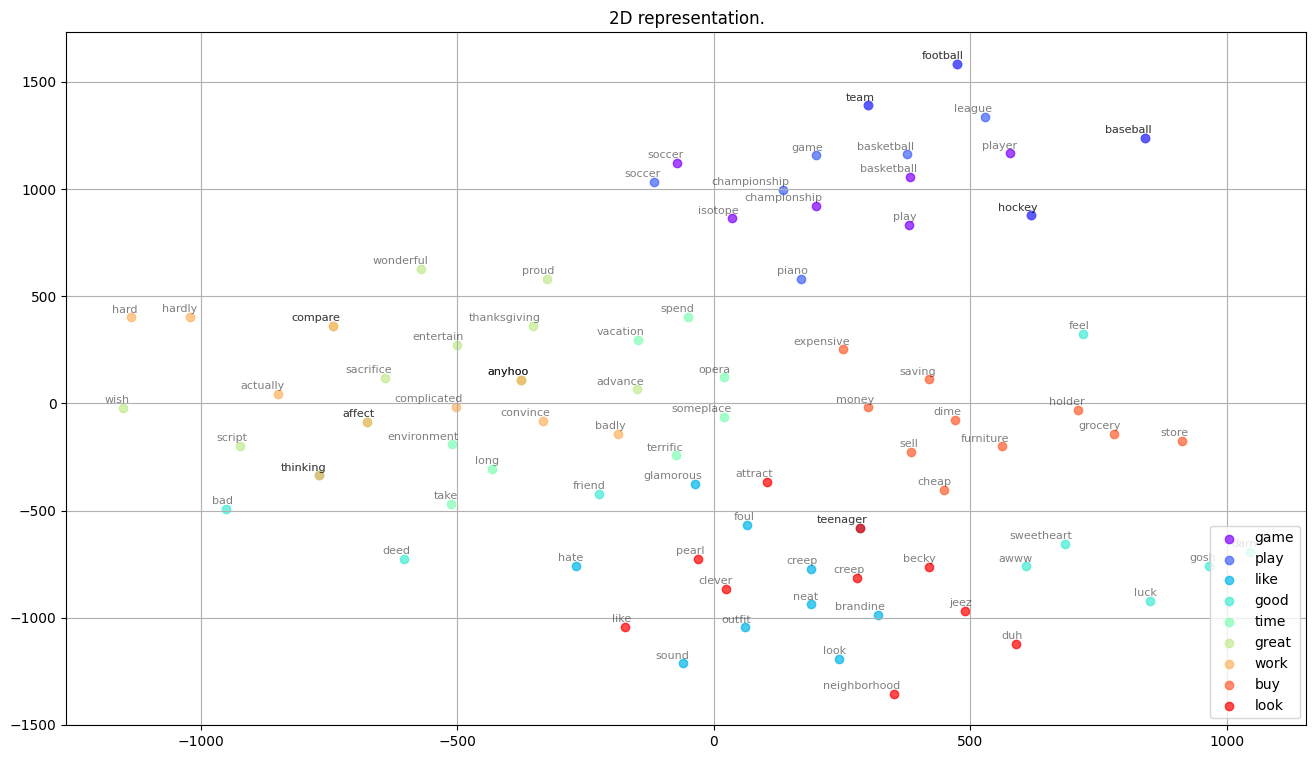

In [36]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline


def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, c=[color], alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    plt.title('2D representation.')
    plt.show()


tsne_plot_similar_words(keys, embeddings_2d, word_clusters)

I used the most frequent words to represent in the embedding visualization.